# Char RNN

1. OneHot via BatchManager



In [1]:
import tensorflow as tf
import NLP_Utils as nlp
import time
import numpy as np

## Hyperparams

In [2]:
#Data
filename = 'tiny_shakespeare.txt'

#Cell
state_size = 200 #Default: 200

#Batches & Vocab
batch_size = 64 #Default: 64
seq_length = 50 #Default: 50
overlap = 25 #Default 25
vocab_strategy = 'all'

#Test
test_size = 300 #Default: 300

## Read Data & Manage Batches

In [3]:
batchManager = nlp.BatchManager()
batchManager.set_params(filename,batch_size,seq_length,overlap,vocab_strategy,mode='onehot')
batchManager.get_params()

num_batches = batchManager._num_batches
vocab_size = batchManager._vocab_size
num_features = vocab_size


@params:
[filename : "tiny_shakespeare.txt"]
[text : "First Citi"]
[text_size : 1115394]
[vocab : ['?', 'i', 'R', 'v', 'y']]
[vocab_size : 65]
[mode : onehot]
[batch_size : 64]
[seq_length : 50]
[overlap : 25]
[num_batches : 697]


In [4]:
batchManager.stats()

The corpus has 1115394 characters
Configuration:
[batch_size : 64]
[seq_length : 50]
[overlap : 25]

The current configuration gives us 697 batches of 64 observations each one looking 50 steps in the past and overlapping 25 steps


## Placeholders

In [5]:
seq = tf.placeholder(dtype=tf.float32,shape=[None,None,vocab_size],name='seq') #[Batch_size x seq_length]

seq_labels = tf.placeholder(dtype=tf.int32,shape=[None,None,num_features],name='seq_labels')

## Create RNN cell

In [6]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=state_size)

'''
batch_size : seq.get_shape()[0] instead of 'batch_size' 
in order to work with variable seq length, this is, for testing char by char
'''
zero_state = cell.zero_state(batch_size=tf.shape(seq)[0],dtype=tf.float32) 


in_state = tf.placeholder_with_default(input=zero_state,shape=[None,state_size])

In [7]:
output, out_state = tf.nn.dynamic_rnn(cell=cell,inputs=seq,initial_state=in_state)

## Create model

In [8]:
logits= tf.contrib.layers.fully_connected(inputs=output,num_outputs=vocab_size,activation_fn=None)

loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=seq_labels))

sample = tf.multinomial(logits=logits[:,-1],num_samples=1)[:,0]

In [9]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

## Train

In [17]:
num_epochs = 10

display_freq = num_batches//10

loss_list = list()
av_loss_list = list()

step = 0

last_epoch = -1

with tf.Session() as sess:
    start = time.time()
    tf.global_variables_initializer().run()
    
    for batchX,batchY,epoch in batchManager.generate_batches(num_epochs=num_epochs):
        
     
        
        if(last_epoch != epoch):
            print('Epoch %d:' % epoch)
            last_epoch = epoch
        
        
        _loss,_ = sess.run([loss,optimizer],{seq:batchX,seq_labels : batchY})
        
        
        loss_list.append(_loss)
        
        
        if(step % display_freq == 0):            
            if len(loss_list)>1: av_loss_list.append(np.average(a=loss_list[-display_freq]))
            
            print('At step %d:%d - Loss: %.2f - Elapsed time: %s' %(epoch,step,_loss,(time.time()-start)))
            
            ###TEST###
            sentence = 'A'
            state = None
            for _ in range(test_size):
                batch = [batchManager.vocab_encode(sentence[-1])] #Last character in sentence
                feed = {seq : batch}
                
                if state is not None: #First is none and must be None
                    feed.update({in_state:state})
                
                index,state = sess.run([sample,out_state],feed)
                
                sentence += batchManager.vocab_decode(index,mode='dense')
            print(sentence,'\n')
            ##########
            start = time.time()
            
        step += 1
            
            
        
        

Epoch 0:
At step 0:0 - Loss: 13372.21 - Elapsed time: 2.131394386291504
Amdbw:OCy! QPWMZIt$rsYAlPYiJl,SpqzQHCaxhkQN.,rot,twcxBLpnRMwL&'wkvRWrOFd:DLl:E:NOH;
EWeLpBKKNuOYsi ?S:bJ-?zKgCMMMktgj!uqhiqN!&Q.3.$VnHrOu'DF!peTappzTeQphWfrtTT. Gj-p,':QMzsKdDgbBhKlBkqRCodrhYGYa&egck&MiSW!t:-bhIXwK'zfT-vuDOQtdZvnqdodV$KEbst! 
3GI
Xq&dpY JcBU?S?d SW'kzw-?M:Bo
xkCS&ipWgXgGUuVuZvH3X-gOM 

At step 0:69 - Loss: 9875.98 - Elapsed time: 5.854576826095581
AKxOdg!Hnr
m. sTtRly
sfnt hmmo usI nssktnat  aeodheku ieye tte- coe:e noeaeasahmou wsaiompttt, rsssdos had  sls v fdo trAa'mhOr sdrl- sv
  dau! sNe tavdy c  Irs IpIsnns gdA taetn
somfinn
Ir'd rorhnsmmoaseeeetvesIlchareg tluo ntieenirhIn
hfGlEiiWllir yeIdIn ehSc
.Ih
o'Il oal hertahutrT
cMfd 
ucei
euTa 

At step 0:138 - Loss: 9169.78 - Elapsed time: 5.823545217514038
Aoy fnt than thswedu wikibe.und,IIly FnRd,

oqs nocsand con
gl  idtwe y Qimhied pueu se tfrhpaM!nSO
ENiiRN snocgTil th:de,
TTfeh snd ;afw?rdey lomr,v
rF ls:usd ram th pom  oosh  oot'rishtth,d f

At step 2:1587 - Loss: 6566.34 - Elapsed time: 5.61395788192749
AMI
ForA glousw thil will menf ip the.--ay me touth of mest rieve-Fay rgate your gmy
Bobe tis the quers, and Aar Perespricepint; you shepowertsena ewser'Th
A lounnplerver
mon's wimy beys Light diringe mond BFirss Coat,
Hale my irlencimusw in of In is r shampingr's mather a diert mart oy grvoul welt e 

At step 2:1656 - Loss: 6285.40 - Elapsed time: 5.972531080245972
A duakeDigst, soing a cepece witheding, chuseryo fereberot and the wath pir, If nay toum ty in wieker,
Gofl mis ancethen.
Your farstish wies.

HORTHUMMERS:
Mo gaill andars, strow tho stand y fasn,
Tnithas
Thil for thut ulvest om sous he
Tuunt thee wo ldse the, meck, Espondeay seanf heare:
Hy ba waull 

At step 2:1725 - Loss: 6135.80 - Elapsed time: 5.748080492019653
A do the meares'st of ther-quye,
way, in hother, Ariold! thous, in's nether,
Bit theie tee he! wale, to the llaco aith hit manton ysurofa.
I wish?

Merse, booc I dear be is tur, chounceld monefes:
Y

At step 4:3174 - Loss: 5380.35 - Elapsed time: 5.581446647644043
ANGSHENRY VI
Fferr pond to yours.
Fow reavene in her enis brouch the laids
Haves'd to the corving Nurvandsed,
Nor him I knaghter'dwith lat stame of Y is bown.
Nuy horet mentachord parvong insfrowct.

KING HENRY Voncauls tead,
Bht molasirs fords torethoivedsunake hard gondury, pulpoo
Or tay I fulentle 

At step 4:3243 - Loss: 6050.71 - Elapsed time: 5.562581777572632
ANd:
Thou land-lo tegpice Wathal thesed
Lise thou as hath he add swyel I admy minnor,
Hillives in to umbeak'nt thill remanived, wheer my leet hit my good on abe be;
an whet hese porery daam;
So nock'st cammord that indy, Lorcoorry dissefess, mewratner'st meselven to seetwil.

Stcentin.

CLASEN:
Ae, t 

At step 4:3312 - Loss: 5522.62 - Elapsed time: 5.580761194229126
Apr it
fot no exerdes of tigy
for of
Onched; there herourse thou tadaysing.

PERIFLOUZER:
Hath dit nonged,
We ery let to ementerest of Oferouldgs net in
need not neen: you bray, comr wine,
For whe-

At step 6:4761 - Loss: 5206.84 - Elapsed time: 5.719537258148193
A tenceike, in withing-it eneryon your offet!

FrYat ankeat a pitned and his nor.

ISABELLA:
Ox hy arong he Thoull so soily
 hat's stist
or held my broccers much of his aus.

DUKE VINCENTIO:
Ifeny's lates? I have spysulien bruchar, on art urman dipen our cerviee tursen affomaty! I mast myouseral.

We 

At step 6:4830 - Loss: 5653.92 - Elapsed time: 5.942830801010132
ANTIRINA:
That efred to fais opt ristle treach.

HARTAUSIO:

ANTIGINS:
Nail, beto hed your'dignalins
What? your wrodse that coin,
Undess shu kindess unon
ast comet be marra,
An, your this to not fore hath a bottless?

BRTTRONCE:
By then yat himet'e the wase: if Kyon. O, courtadines;
Withee that arp r 

Epoch 7:
At step 7:4899 - Loss: 5755.03 - Elapsed time: 7.763644456863403
ANDE:
And they hrom a thound, ald be dound delich are and nound a sit reds!
I'll butas uptert,--

NONDUSICA:
If sife er
An, bottour greal dedery.

VONCHIO:
Margur wipld not wift timan 'tis

At step 9:6348 - Loss: 5347.50 - Elapsed time: 5.893012046813965
Agaliusaded.

VOLUMNIA:
Why seaver, hore,--nowere a gald thou.

Assile Sentimen:--the sen pentuce.

TERCIUSIA:
For I bose they,
Aw'tto the winges: sure so ray he smikent store,--
Signistuntasted then;
At and thingsamed:
Ourthelly my tyors: must but our sesper?

SOBIDIUS:
What this corto suctice add m 

At step 9:6417 - Loss: 5267.81 - Elapsed time: 5.9665138721466064
A detieed that is grain givence, what! by to sigh'd his
tear, for what yauralior she plust me, I dwald and I Kangors:
Lort soblave gown abromay:
'Tis faightul in leavo.
The groce.
O, brine to break ob hivon deneC!

ELANENSUCES:
And you thy lord,
Fronftroup is all come, no, and to my mering; grace
Dis 

At step 9:6486 - Loss: 5244.84 - Elapsed time: 5.9850146770477295
A all this sovesid hair Like loest
Morrow, on the repper, lordel.

KING RICHARD II:
Herr which the dary allare'to to head.

KING RICHARD II:
By siacer domf and love to his can head Dietour?

KING

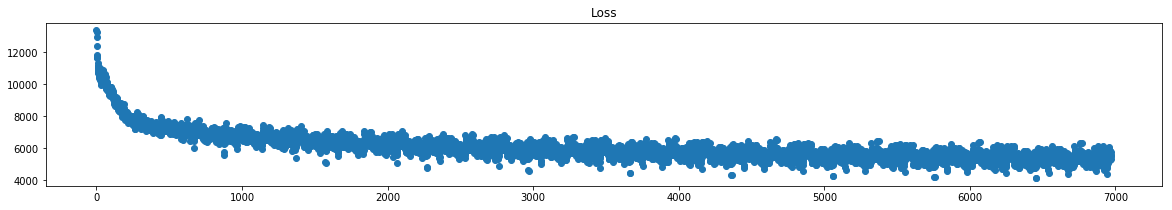

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,3))
plt.title('Loss')
plt.scatter(x=range(len(loss_list)),y=loss_list)
plt.show()

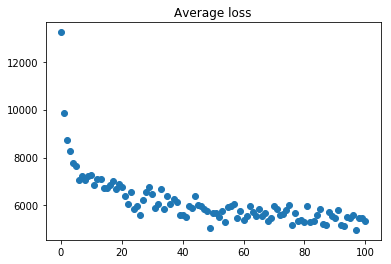

In [19]:
plt.title('Average loss')
plt.scatter(x=range(len(av_loss_list)),y=av_loss_list)
plt.show()